"""
案例:
    演示 欠拟合, 正好拟合, 过拟合, L1正则化, L2正则化的 效果图.

回顾:
    欠拟合:    模型在训练集 和 测试集表现效果都不好.
    正好拟合:   模型在训练集 和 测试集表现效果都好.
    过拟合:    模型在训练集表现好, 测试集表现不好.

过拟合, 欠拟合解释:
    产生原因:
        欠拟合: 模型简单.
        过拟合: 模型复杂.
    解决方案:
        欠拟合: 增加特征, 从而增加 模型的复杂度.
        过拟合: 减少模型复杂度, 手动筛选(减少)特征, L1和L2正则化.

L1和L2正则化介绍:
    目的/思路:
        都是基于 惩罚系数 来修改(特征列的)权重的, 惩罚系数越大, 则修改力度就越大, 对应的权重就越小.
    区别:
        L1正则化, 可以实现让权重变为0, 从而达到 特征选择的目的.
        L2正则化, 只能让权重无限趋近于0, 但是不能为0.
    大白话:
        我要去爬山, 带了个小包, 装了: 登山杖, 水, 面包, 衣服, 雨伞, 鞋子...  发现包装不下了.
        L1正则化: 可以实现去掉一些不是必选的, 例如: 当天去, 当前回, 且天气晴朗 -> 不带雨伞, 鞋子, 即: 权重为0
        L2正则化: 换一个非常非常大的包, 还是那些物品, 但是空间占用(权重)就变小了...
"""

In [1]:
# 导包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression       # 正规方程的回归模型
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error  # 均方误差评估, RMSE, MAE
from sklearn.linear_model import Lasso, Ridge           # L1正则化, L2正则化


# 1. 定义函数, 模拟: 欠拟合.

In [2]:
def dm01_under_fitting():
    # 1. 准备数据.
    # 1.1 指定随机种子, 则每次生成(噪声)的数据都是固定的.
    np.random.seed(23)
    # 1.2 随机生成x轴 100个数据, 模拟: 特征.
    x = np.random.uniform(-3, 3, 100)   # 参1: 最小值, 参2: 最大值, 参3: 生成个数
    # 1.3 基于x轴值, 通过线性公式, 生成y轴 100个数据, 模拟: 标签.
    # 线性公式: y = kx + b = 0.5 * x ** 2 + x + 2 + 噪声
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)  # 参1: 平均值, 参2: 标准差, 参3: 生成个数
    # 1.4 查看生成的 x轴(特征) 和 y轴(标签)的数据.
    print(f'特征(x): {x[:5]}')        # [1, 2, 3, 4, 5]
    print(f'标签(y): {y[:5]}')

    # 2. 数据预处理, 把x轴(特征)转成 多行1列的形式.
    X = x.reshape(-1, 1)
    print(f'处理后的特征: {X[:5]}')    # [[1], [2], [3], [4], [5]]

    # 3. 特征工程, 这里不做了, 直接用100条数据, 先训练, 后预测.

    # 4. 模型训练.
    # 4.1 创建模型对象.
    estimator = LinearRegression()      # 正规方程 线性回归模型.
    # 4.2 模型训练.
    estimator.fit(X, y)                 # 参1: 处理后的特征数据. 参2: 标签数据.

    # 5. 模型预测.
    y_predict = estimator.predict(X)    # 处理后的特征数据

    # 6. 模型评估.
    print(f'均方误差: {mean_squared_error(y, y_predict)}')      # 参1: 真实值, 参2: 预测值.

    # 7. 绘图.
    plt.scatter(x, y)                           # 以散点图的形式绘制 真实值.
    plt.plot(x, y_predict, color='red')   # 以线图的形式绘制 预测值.
    plt.show()

特征(x): [ 0.1037873   2.68177562  1.59275856 -1.30562494 -1.67372782]
标签(y): [ 3.03016904 10.2108257   4.06583525  0.5351681   3.87773453]
处理后的特征: [[ 0.1037873 ]
 [ 2.68177562]
 [ 1.59275856]
 [-1.30562494]
 [-1.67372782]]
均方误差: 3.190170974414723


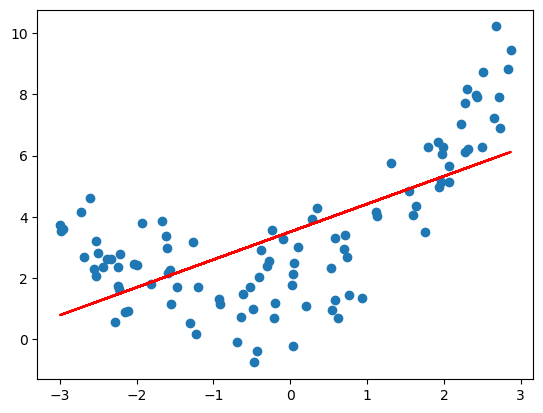

In [3]:
dm01_under_fitting()

# 2. 定义函数, 模拟: 正好拟合.

In [4]:
def dm02_just_fitting():
    # 1. 准备数据.
    # 1.1 指定随机种子, 则每次生成(噪声)的数据都是固定的.
    np.random.seed(23)
    # 1.2 随机生成x轴 100个数据, 模拟: 特征.
    x = np.random.uniform(-3, 3, 100)  # 参1: 最小值, 参2: 最大值, 参3: 生成个数
    # 1.3 基于x轴值, 通过线性公式, 生成y轴 100个数据, 模拟: 标签.
    # 线性公式: y = kx + b = 0.5 * x ** 2 + x + 2 + 噪声
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)  # 参1: 平均值, 参2: 标准差, 参3: 生成个数
    # 1.4 查看生成的 x轴(特征) 和 y轴(标签)的数据.
    print(f'特征(x): {x[:5]}')  # [1, 2, 3, 4, 5]
    print(f'标签(y): {y[:5]}')

    # 2. 数据预处理, 把x轴(特征)转成 多行1列的形式.
    # 2.1 把上述的x轴(特征)转成 多行1列的形式, 即: [[1], [2], [3], [4], [5]]
    X = x.reshape(-1, 1)
    print(f'处理后的特征: {X[:5]}')  # [[1], [2], [3], [4], [5]]

    # 2.2 因为目前特征列只有1列, 模型过于简单, 会出现欠拟合的问题, 我们增加1列 特征列, 从而增加模型的复杂度.
    # 即: 把数据从  [[1], [2], [3], [4], [5]] =>  [[1, 1], [2, 4], [3, 9], [4, 16], [5, 25]]
    X2 = np.hstack([X, X ** 2])  # 该函数作用: 横向拼接, 即: 拼接2个数组, 拼接后数组的行数不变, 拼接后数组的列数等于拼接前数组的列数之和.
    print(f'处理后的特征: {X2[:5]}')

    # 3. 特征工程, 这里不做了, 直接用100条数据, 先训练, 后预测.

    # 4. 模型训练.
    # 4.1 创建模型对象.
    estimator = LinearRegression()  # 正规方程 线性回归模型.
    # 4.2 模型训练.
    estimator.fit(X2, y)  # 参1: 处理后的特征数据. 参2: 标签数据.

    # 5. 模型预测.
    y_predict = estimator.predict(X2)  # 处理后的特征数据

    # 6. 模型评估.
    print(f'均方误差: {mean_squared_error(y, y_predict)}')  # 参1: 真实值, 参2: 预测值.

    # 7. 绘图.
    plt.scatter(x, y)  # 以散点图的形式绘制 真实值.
    # np.sort(x): 对x轴(特征)排序, 默认是: 升序.
    # np.argsort(x): 对x轴(特征)排序, 返回排序后的索引.
    # 例如:   排序前x轴是 [11, 33, 22] -> 对应索引: [0, 1, 2]
    # 排序后: x轴是      [11, 22, 33] -> 对应索引: [0, 2, 1]
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')  # 以线图的形式绘制 预测值.
    plt.show()


特征(x): [ 0.1037873   2.68177562  1.59275856 -1.30562494 -1.67372782]
标签(y): [ 3.03016904 10.2108257   4.06583525  0.5351681   3.87773453]
处理后的特征: [[ 0.1037873 ]
 [ 2.68177562]
 [ 1.59275856]
 [-1.30562494]
 [-1.67372782]]
处理后的特征: [[ 0.1037873   0.0107718 ]
 [ 2.68177562  7.19192049]
 [ 1.59275856  2.53687982]
 [-1.30562494  1.70465647]
 [-1.67372782  2.80136482]]
均方误差: 1.0934609127807469


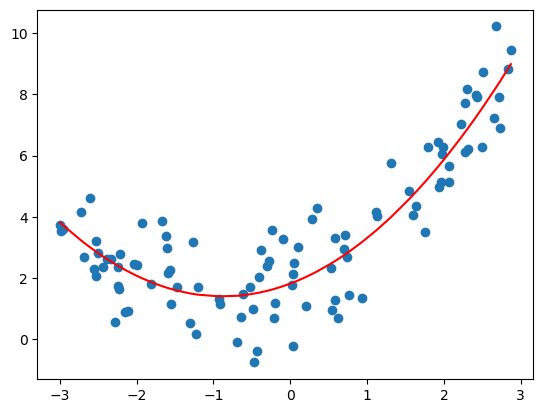

In [5]:
dm02_just_fitting()

# 3. 定义函数, 模拟: 过拟合.

In [6]:
def dm03_over_fitting():
    # 1. 准备数据.
    # 1.1 指定随机种子, 则每次生成(噪声)的数据都是固定的.
    np.random.seed(23)
    # 1.2 随机生成x轴 100个数据, 模拟: 特征.
    x = np.random.uniform(-3, 3, 100)  # 参1: 最小值, 参2: 最大值, 参3: 生成个数
    # 1.3 基于x轴值, 通过线性公式, 生成y轴 100个数据, 模拟: 标签.
    # 线性公式: y = kx + b = 0.5 * x ** 2 + x + 2 + 噪声
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)  # 参1: 平均值, 参2: 标准差, 参3: 生成个数
    # 1.4 查看生成的 x轴(特征) 和 y轴(标签)的数据.
    print(f'特征(x): {x[:5]}')  # [1, 2, 3, 4, 5]
    print(f'标签(y): {y[:5]}')

    # 2. 数据预处理, 把x轴(特征)转成 多行1列的形式.
    # 2.1 把上述的x轴(特征)转成 多行1列的形式, 即: [[1], [2], [3], [4], [5]]
    X = x.reshape(-1, 1)
    print(f'处理后的特征: {X[:5]}')  # [[1], [2], [3], [4], [5]]

    # 2.2 因为目前特征列只有1列, 模型过于简单, 为了模拟过拟合, 我们增加9列 特征列, 从而增加模型的复杂度.
    # 即: 把数据从  [[1], [2], [3], [4], [5]] =>  [[1, 1**2, 1**3, 1**4, 1**5...], [2, 2**2, 2**3, 2**4, 2**5], [3...]...]
    # 该函数作用: 横向拼接, 即: 拼接多个数组, 拼接后数组的行数不变, 拼接后数组的列数等于拼接前数组的列数之和.
    X3 = np.hstack([X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8, X ** 9, X ** 10])
    print(f'处理后的特征: {X3[:5]}')

    # 3. 特征工程, 这里不做了, 直接用100条数据, 先训练, 后预测.

    # 4. 模型训练.
    # 4.1 创建模型对象.
    estimator = LinearRegression()  # 正规方程 线性回归模型.
    # 4.2 模型训练.
    estimator.fit(X3, y)  # 参1: 处理后的特征数据. 参2: 标签数据.

    # 5. 模型预测.
    y_predict = estimator.predict(X3)  # 处理后的特征数据

    # 6. 模型评估.
    print(f'均方误差: {mean_squared_error(y, y_predict)}')  # 参1: 真实值, 参2: 预测值.

    # 7. 绘图.
    plt.scatter(x, y)  # 以散点图的形式绘制 真实值.
    # np.sort(x): 对x轴(特征)排序, 默认是: 升序.
    # np.argsort(x): 对x轴(特征)排序, 返回排序后的索引.
    # 例如:   排序前x轴是 [11, 33, 22] -> 对应索引: [0, 1, 2]
    # 排序后: x轴是      [11, 22, 33] -> 对应索引: [0, 2, 1]
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')  # 以线图的形式绘制 预测值.
    plt.show()

特征(x): [ 0.1037873   2.68177562  1.59275856 -1.30562494 -1.67372782]
标签(y): [ 3.03016904 10.2108257   4.06583525  0.5351681   3.87773453]
处理后的特征: [[ 0.1037873 ]
 [ 2.68177562]
 [ 1.59275856]
 [-1.30562494]
 [-1.67372782]]
处理后的特征: [[ 1.03787303e-01  1.07718043e-02  1.11797652e-03  1.16031767e-04
   1.20426242e-05  1.24987149e-06  1.29720791e-07  1.34633711e-08
   1.39732697e-09  1.45024798e-10]
 [ 2.68177562e+00  7.19192049e+00  1.92871171e+01  5.17237204e+01
   1.38711412e+02  3.71992884e+02  9.97601449e+02  2.67534325e+03
   7.17467030e+03  1.92408559e+04]
 [ 1.59275856e+00  2.53687982e+00  4.04063704e+00  6.43575922e+00
   1.02506106e+01  1.63267477e+01  2.60045671e+01  4.14189967e+01
   6.59704614e+01  1.05075017e+02]
 [-1.30562494e+00  1.70465647e+00 -2.22564200e+00  2.90585369e+00
  -3.79395504e+00  4.95348231e+00 -6.46739003e+00  8.44398569e+00
  -1.10246783e+01  1.43940949e+01]
 [-1.67372782e+00  2.80136482e+00 -4.68872223e+00  7.84764484e+00
  -1.31348215e+01  2.19841161e+01 -3

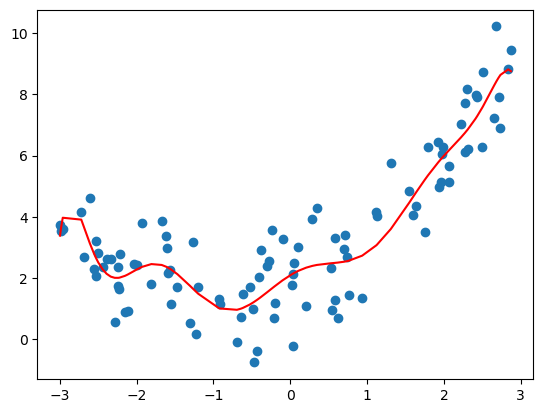

In [7]:
dm03_over_fitting()

# 4. 定义函数, 模拟: L1正则化.

In [8]:
def dm04_l1_regularization():
    # 1. 准备数据.
    # 1.1 指定随机种子, 则每次生成(噪声)的数据都是固定的.
    np.random.seed(23)
    # 1.2 随机生成x轴 100个数据, 模拟: 特征.
    x = np.random.uniform(-3, 3, 100)  # 参1: 最小值, 参2: 最大值, 参3: 生成个数
    # 1.3 基于x轴值, 通过线性公式, 生成y轴 100个数据, 模拟: 标签.
    # 线性公式: y = kx + b = 0.5 * x ** 2 + x + 2 + 噪声
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)  # 参1: 平均值, 参2: 标准差, 参3: 生成个数
    # 1.4 查看生成的 x轴(特征) 和 y轴(标签)的数据.
    print(f'特征(x): {x[:5]}')  # [1, 2, 3, 4, 5]
    print(f'标签(y): {y[:5]}')

    # 2. 数据预处理, 把x轴(特征)转成 多行1列的形式.
    # 2.1 把上述的x轴(特征)转成 多行1列的形式, 即: [[1], [2], [3], [4], [5]]
    X = x.reshape(-1, 1)
    print(f'处理后的特征: {X[:5]}')  # [[1], [2], [3], [4], [5]]

    # 2.2 因为目前特征列只有1列, 模型过于简单, 为了模拟过拟合, 我们增加9列 特征列, 从而增加模型的复杂度.
    # 即: 把数据从  [[1], [2], [3], [4], [5]] =>  [[1, 1**2, 1**3, 1**4, 1**5...], [2, 2**2, 2**3, 2**4, 2**5], [3...]...]
    # 该函数作用: 横向拼接, 即: 拼接多个数组, 拼接后数组的行数不变, 拼接后数组的列数等于拼接前数组的列数之和.
    X3 = np.hstack([X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8, X ** 9, X ** 10])
    print(f'处理后的特征: {X3[:5]}')

    # 3. 特征工程, 这里不做了, 直接用100条数据, 先训练, 后预测.

    # 4. 模型训练.
    # 4.1 创建模型对象.
    # estimator = LinearRegression()  # 正规方程 线性回归模型.
    # 改为创建 L1正则化对象.
    estimator = Lasso(alpha=0.1)    # alpha: 正则化系数(惩罚系数), 默认是: 1.

    # 4.2 模型训练.
    estimator.fit(X3, y)  # 参1: 处理后的特征数据. 参2: 标签数据.

    # 5. 模型预测.
    y_predict = estimator.predict(X3)  # 处理后的特征数据

    # 6. 模型评估.
    print(f'均方误差: {mean_squared_error(y, y_predict)}')  # 参1: 真实值, 参2: 预测值.

    # 7. 绘图.
    plt.scatter(x, y)  # 以散点图的形式绘制 真实值.
    # np.sort(x): 对x轴(特征)排序, 默认是: 升序.
    # np.argsort(x): 对x轴(特征)排序, 返回排序后的索引.
    # 例如:   排序前x轴是 [11, 33, 22] -> 对应索引: [0, 1, 2]
    # 排序后: x轴是      [11, 22, 33] -> 对应索引: [0, 2, 1]
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')  # 以线图的形式绘制 预测值.
    plt.show()

特征(x): [ 0.1037873   2.68177562  1.59275856 -1.30562494 -1.67372782]
标签(y): [ 3.03016904 10.2108257   4.06583525  0.5351681   3.87773453]
处理后的特征: [[ 0.1037873 ]
 [ 2.68177562]
 [ 1.59275856]
 [-1.30562494]
 [-1.67372782]]
处理后的特征: [[ 1.03787303e-01  1.07718043e-02  1.11797652e-03  1.16031767e-04
   1.20426242e-05  1.24987149e-06  1.29720791e-07  1.34633711e-08
   1.39732697e-09  1.45024798e-10]
 [ 2.68177562e+00  7.19192049e+00  1.92871171e+01  5.17237204e+01
   1.38711412e+02  3.71992884e+02  9.97601449e+02  2.67534325e+03
   7.17467030e+03  1.92408559e+04]
 [ 1.59275856e+00  2.53687982e+00  4.04063704e+00  6.43575922e+00
   1.02506106e+01  1.63267477e+01  2.60045671e+01  4.14189967e+01
   6.59704614e+01  1.05075017e+02]
 [-1.30562494e+00  1.70465647e+00 -2.22564200e+00  2.90585369e+00
  -3.79395504e+00  4.95348231e+00 -6.46739003e+00  8.44398569e+00
  -1.10246783e+01  1.43940949e+01]
 [-1.67372782e+00  2.80136482e+00 -4.68872223e+00  7.84764484e+00
  -1.31348215e+01  2.19841161e+01 -3

/home/hm/micromamba/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.801e+01, tolerance: 5.772e-02
  model = cd_fast.enet_coordinate_descent(


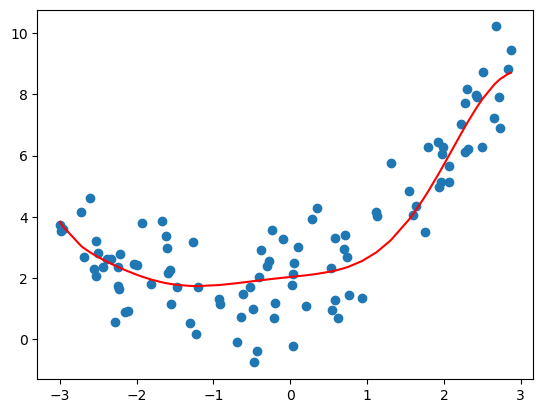

In [9]:
dm04_l1_regularization()

# 5. 定义函数, 模拟: L2正则化.

In [10]:
def dm05_l2_regularization():
    # 1. 准备数据.
    # 1.1 指定随机种子, 则每次生成(噪声)的数据都是固定的.
    np.random.seed(23)
    # 1.2 随机生成x轴 100个数据, 模拟: 特征.
    x = np.random.uniform(-3, 3, 100)  # 参1: 最小值, 参2: 最大值, 参3: 生成个数
    # 1.3 基于x轴值, 通过线性公式, 生成y轴 100个数据, 模拟: 标签.
    # 线性公式: y = kx + b = 0.5 * x ** 2 + x + 2 + 噪声
    y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)  # 参1: 平均值, 参2: 标准差, 参3: 生成个数
    # 1.4 查看生成的 x轴(特征) 和 y轴(标签)的数据.
    print(f'特征(x): {x[:5]}')  # [1, 2, 3, 4, 5]
    print(f'标签(y): {y[:5]}')

    # 2. 数据预处理, 把x轴(特征)转成 多行1列的形式.
    # 2.1 把上述的x轴(特征)转成 多行1列的形式, 即: [[1], [2], [3], [4], [5]]
    X = x.reshape(-1, 1)
    print(f'处理后的特征: {X[:5]}')  # [[1], [2], [3], [4], [5]]

    # 2.2 因为目前特征列只有1列, 模型过于简单, 为了模拟过拟合, 我们增加9列 特征列, 从而增加模型的复杂度.
    # 即: 把数据从  [[1], [2], [3], [4], [5]] =>  [[1, 1**2, 1**3, 1**4, 1**5...], [2, 2**2, 2**3, 2**4, 2**5], [3...]...]
    # 该函数作用: 横向拼接, 即: 拼接多个数组, 拼接后数组的行数不变, 拼接后数组的列数等于拼接前数组的列数之和.
    X3 = np.hstack([X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8, X ** 9, X ** 10])
    print(f'处理后的特征: {X3[:5]}')

    # 3. 特征工程, 这里不做了, 直接用100条数据, 先训练, 后预测.

    # 4. 模型训练.
    # 4.1 创建模型对象.
    # estimator = LinearRegression()  # 正规方程 线性回归模型.

    # 改为创建 L1正则化对象.
    # estimator = Lasso(alpha=0.1)    # alpha: 正则化系数(惩罚系数), 默认是: 1.

    # 改为创建 L2正则化对象.
    estimator = Ridge(alpha=10)

    # 4.2 模型训练.
    estimator.fit(X3, y)  # 参1: 处理后的特征数据. 参2: 标签数据.

    # 5. 模型预测.
    y_predict = estimator.predict(X3)  # 处理后的特征数据

    # 6. 模型评估.
    print(f'均方误差: {mean_squared_error(y, y_predict)}')  # 参1: 真实值, 参2: 预测值.

    # 7. 绘图.
    plt.scatter(x, y)  # 以散点图的形式绘制 真实值.
    # np.sort(x): 对x轴(特征)排序, 默认是: 升序.
    # np.argsort(x): 对x轴(特征)排序, 返回排序后的索引.
    # 例如:   排序前x轴是 [11, 33, 22] -> 对应索引: [0, 1, 2]
    # 排序后: x轴是      [11, 22, 33] -> 对应索引: [0, 2, 1]
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')  # 以线图的形式绘制 预测值.
    plt.show()

特征(x): [ 0.1037873   2.68177562  1.59275856 -1.30562494 -1.67372782]
标签(y): [ 3.03016904 10.2108257   4.06583525  0.5351681   3.87773453]
处理后的特征: [[ 0.1037873 ]
 [ 2.68177562]
 [ 1.59275856]
 [-1.30562494]
 [-1.67372782]]
处理后的特征: [[ 1.03787303e-01  1.07718043e-02  1.11797652e-03  1.16031767e-04
   1.20426242e-05  1.24987149e-06  1.29720791e-07  1.34633711e-08
   1.39732697e-09  1.45024798e-10]
 [ 2.68177562e+00  7.19192049e+00  1.92871171e+01  5.17237204e+01
   1.38711412e+02  3.71992884e+02  9.97601449e+02  2.67534325e+03
   7.17467030e+03  1.92408559e+04]
 [ 1.59275856e+00  2.53687982e+00  4.04063704e+00  6.43575922e+00
   1.02506106e+01  1.63267477e+01  2.60045671e+01  4.14189967e+01
   6.59704614e+01  1.05075017e+02]
 [-1.30562494e+00  1.70465647e+00 -2.22564200e+00  2.90585369e+00
  -3.79395504e+00  4.95348231e+00 -6.46739003e+00  8.44398569e+00
  -1.10246783e+01  1.43940949e+01]
 [-1.67372782e+00  2.80136482e+00 -4.68872223e+00  7.84764484e+00
  -1.31348215e+01  2.19841161e+01 -3

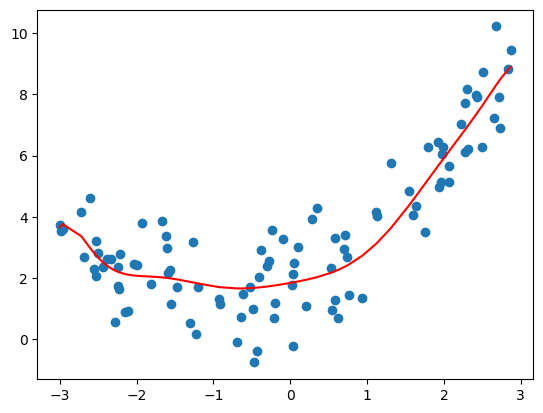

In [11]:
dm05_l2_regularization()